In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [2]:
df = pd.read_csv("books.csv",sep=",") #,index_col="bookID"

In [3]:
# Replace 'your_detected_encoding' with the actual encoding detected, e.g., 'utf-8'
df = pd.read_csv('books.csv', index_col="bookID", encoding='utf-8')

# Print the DataFrame to verify that the text is readabl
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,unnamed
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [4]:
df_language_code = df["language_code"].reset_index(drop=True)

In [5]:
df_language_code.to_csv("language_code.csv")

In [6]:
df.isnull().values.any()

np.True_

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,unnamed
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9.78E+12,en-US,152,19,1,4/26/2005,Nimble Books,NaN
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.78E+12,eng,3342,28242,808,9/12/2005,Scholastic,NaN
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9.78E+12,eng,815,3628,254,11/1/2005,Gramercy Books,NaN
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9.78E+12,eng,815,249558,4080,4/30/2002,Del Rey Books,NaN


In [9]:
df.shape

(11127, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   isbn                11127 non-null  object
 4   isbn13              11127 non-null  object
 5   language_code       11127 non-null  object
 6   num_pages           11127 non-null  object
 7   ratings_count       11127 non-null  int64 
 8   text_reviews_count  11127 non-null  int64 
 9   publication_date    11127 non-null  object
 10  publisher           11127 non-null  object
 11  unnamed             4 non-null      object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


Check dimension of the data

In [11]:
df.ndim

2

In [12]:
df.describe()

,ratings_count,text_reviews_count
count,1.112700e+04,11127.000000
mean,1.793649e+04,541.864474
std,1.124794e+05,2576.174610
min,0.000000e+00,0.000000
25%,1.040000e+02,9.000000
50%,7.450000e+02,47.000000
75%,4.993500e+03,237.500000
max,4.597666e+06,94265.000000


In [13]:
df.columns[:]

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'unnamed'],
      dtype='object')

In [14]:
df.loc[16914]

title                                 The Tolkien Fan's Medieval Reader
authors                        David E. Smith (Turgon of TheOneRing.net
average_rating         one of the founding members of this Tolkien w...
isbn                                                               3.58
isbn13                                                       1593600119
language_code                                                  9.78E+12
num_pages                                                           eng
ratings_count                                                       400
text_reviews_count                                                   26
publication_date                                                      4
publisher                                                      4/6/2004
unnamed                                               Cold Spring Press
Name: 16914, dtype: object

In [15]:
#df['authors'].replace("David E. Smith (Turgon of TheOneRing.net","David E. Smith",inplace=True)

In [16]:
df.loc[16914]

title                                 The Tolkien Fan's Medieval Reader
authors                        David E. Smith (Turgon of TheOneRing.net
average_rating         one of the founding members of this Tolkien w...
isbn                                                               3.58
isbn13                                                       1593600119
language_code                                                  9.78E+12
num_pages                                                           eng
ratings_count                                                       400
text_reviews_count                                                   26
publication_date                                                      4
publisher                                                      4/6/2004
unnamed                                               Cold Spring Press
Name: 16914, dtype: object

In [17]:
df['average_rating'].replace(" one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)",np.nan,inplace=True)
df['authors'].replace("David E. Smith (Turgon of TheOneRing.net","David E. Smith",inplace=True)

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\3323232914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_rating'].replace(" one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)",np.nan,inplace=True)
C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\3323232914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will nev

In [18]:
df.loc[16914]

title                 The Tolkien Fan's Medieval Reader
authors                                  David E. Smith
average_rating                                      NaN
isbn                                               3.58
isbn13                                       1593600119
language_code                                  9.78E+12
num_pages                                           eng
ratings_count                                       400
text_reviews_count                                   26
publication_date                                      4
publisher                                      4/6/2004
unnamed                               Cold Spring Press
Name: 16914, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11126 non-null  object
 3   isbn                11127 non-null  object
 4   isbn13              11127 non-null  object
 5   language_code       11127 non-null  object
 6   num_pages           11127 non-null  object
 7   ratings_count       11127 non-null  int64 
 8   text_reviews_count  11127 non-null  int64 
 9   publication_date    11127 non-null  object
 10  publisher           11127 non-null  object
 11  unnamed             4 non-null      object
dtypes: int64(2), object(10)
memory usage: 1.4+ MB


In [20]:
#concatonate authors from col. authors and average_rating
combined_value1 = df.loc[12224,'authors']+df.loc[12224,'average_rating']
df.loc[12224,'authors'] = combined_value1

In [21]:
df.loc[16914]

title                 The Tolkien Fan's Medieval Reader
authors                                  David E. Smith
average_rating                                      NaN
isbn                                               3.58
isbn13                                       1593600119
language_code                                  9.78E+12
num_pages                                           eng
ratings_count                                       400
text_reviews_count                                   26
publication_date                                      4
publisher                                      4/6/2004
unnamed                               Cold Spring Press
Name: 16914, dtype: object

In [22]:
#combined_value2 = df.loc[16914,'authors']+df.loc[16914,'average_rating']
#df.loc[16914,'authors'] = combined_value2
combined_value3 = str(df.loc[22128,'authors'])+","+str(df.loc[22128,'average_rating'])
df.loc[22128,'authors'] = combined_value3

In [23]:
combined_value4 = str(df.loc[34889,'authors'])+str(df.loc[34889,'average_rating'])
df.loc[34889,'authors'] = combined_value4

In [24]:
#replace the unfinished author list with the concatonated values aboved
df.loc[12224,'authors'] = combined_value1
#df.loc[16914,'authors'] = combined_value2
df.loc[22128,'authors'] = combined_value3
df.loc[34889,'authors'] = combined_value4

In [25]:
#readjust misaligned columns values by shifting all columns to the left
df.loc[12224,'average_rating'] = df.loc[12224,'isbn']
df.loc[12224,'isbn'] = df.loc[12224,'isbn13']
df.loc[12224,'isbn13'] = df.loc[12224,'language_code']
df.loc[12224,'language_code'] = df.loc[12224,'num_pages']
df.loc[12224,'num_pages'] = df.loc[12224,'ratings_count']
df.loc[12224,'ratings_count'] = df.loc[12224,'text_reviews_count']
df.loc[12224,'text_reviews_count'] = df.loc[12224,'publication_date']
df.loc[12224,'publication_date'] = df.loc[12224,'publisher']
df.loc[12224,'publisher'] = df.loc[12224,'unnamed']

df.loc[16914,'average_rating'] = df.loc[16914,'isbn']
df.loc[16914,'isbn'] = df.loc[16914,'isbn13']
df.loc[16914,'isbn13'] = df.loc[16914,'language_code']
df.loc[16914,'language_code'] = df.loc[16914,'num_pages']
df.loc[16914,'num_pages'] = df.loc[16914,'ratings_count']
df.loc[16914,'ratings_count'] = df.loc[16914,'text_reviews_count']
df.loc[16914,'text_reviews_count'] = df.loc[16914,'publication_date']
df.loc[16914,'publication_date'] = df.loc[16914,'publisher']
df.loc[16914,'publisher'] = df.loc[16914,'unnamed']

df.loc[22128,'average_rating'] = df.loc[22128,'isbn']
df.loc[22128,'isbn'] = df.loc[22128,'isbn13']
df.loc[22128,'isbn13'] = df.loc[22128,'language_code']
df.loc[22128,'language_code'] = df.loc[22128,'num_pages']
df.loc[22128,'num_pages'] = df.loc[22128,'ratings_count']
df.loc[22128,'ratings_count'] = df.loc[22128,'text_reviews_count']
df.loc[22128,'text_reviews_count'] = df.loc[22128,'publication_date']
df.loc[22128,'publication_date'] = df.loc[22128,'publisher']
df.loc[22128,'publisher'] = df.loc[22128,'unnamed']

df.loc[34889,'average_rating'] = df.loc[34889,'isbn']
df.loc[34889,'isbn'] = df.loc[34889,'isbn13']
df.loc[34889,'isbn13'] = df.loc[34889,'language_code']
df.loc[34889,'language_code'] = df.loc[34889,'num_pages']
df.loc[34889,'num_pages'] = df.loc[34889,'ratings_count']
df.loc[34889,'ratings_count'] = df.loc[34889,'text_reviews_count']
df.loc[34889,'text_reviews_count'] = df.loc[34889,'publication_date']
df.loc[34889,'publication_date'] = df.loc[34889,'publisher']
df.loc[34889,'publisher'] = df.loc[34889,'unnamed']

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\2220463412.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[12224,'text_reviews_count'] = df.loc[12224,'publication_date']


In [26]:
df.loc[12224]

title                 Streetcar Suburbs: The Process of Growth in Bo...
authors                               Sam Bass Warner Jr./Sam B. Warner
average_rating                                                     3.58
isbn                                                          674842111
isbn13                                                         9.78E+12
language_code                                                     en-US
num_pages                                                           236
ratings_count                                                        61
text_reviews_count                                                    6
publication_date                                              4/20/2004
publisher                                      Harvard University Press
unnamed                                        Harvard University Press
Name: 12224, dtype: object

In [27]:
df.loc[22128]

title                 Patriots (The Coming Collapse)
authors                         James Wesley, Rawles
average_rating                                  3.63
isbn                                      156384155X
isbn13                                      9.78E+12
language_code                                    eng
num_pages                                        342
ratings_count                                     38
text_reviews_count                                 4
publication_date                           1/15/1999
publisher                Huntington House Publishers
unnamed                  Huntington House Publishers
Name: 22128, dtype: object

In [28]:
df.loc[34889]

title                 Brown's Star Atlas: Showing All The Bright Sta...
authors                                            Brown Son & Ferguson
average_rating                                                        0
isbn                                                          851742718
isbn13                                                         9.78E+12
language_code                                                       eng
num_pages                                                            49
ratings_count                                                         0
text_reviews_count                                                    0
publication_date                                               5/1/1977
publisher                                     Brown Son & Ferguson Ltd.
unnamed                                       Brown Son & Ferguson Ltd.
Name: 34889, dtype: object

In [29]:
df.loc[16914]

title                 The Tolkien Fan's Medieval Reader
authors                                  David E. Smith
average_rating                                     3.58
isbn                                         1593600119
isbn13                                         9.78E+12
language_code                                       eng
num_pages                                           400
ratings_count                                        26
text_reviews_count                                    4
publication_date                               4/6/2004
publisher                             Cold Spring Press
unnamed                               Cold Spring Press
Name: 16914, dtype: object

In [30]:
df.drop(columns='unnamed',axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   isbn                11127 non-null  object
 4   isbn13              11127 non-null  object
 5   language_code       11127 non-null  object
 6   num_pages           11127 non-null  object
 7   ratings_count       11127 non-null  int64 
 8   text_reviews_count  11127 non-null  object
 9   publication_date    11127 non-null  object
 10  publisher           11127 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [32]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

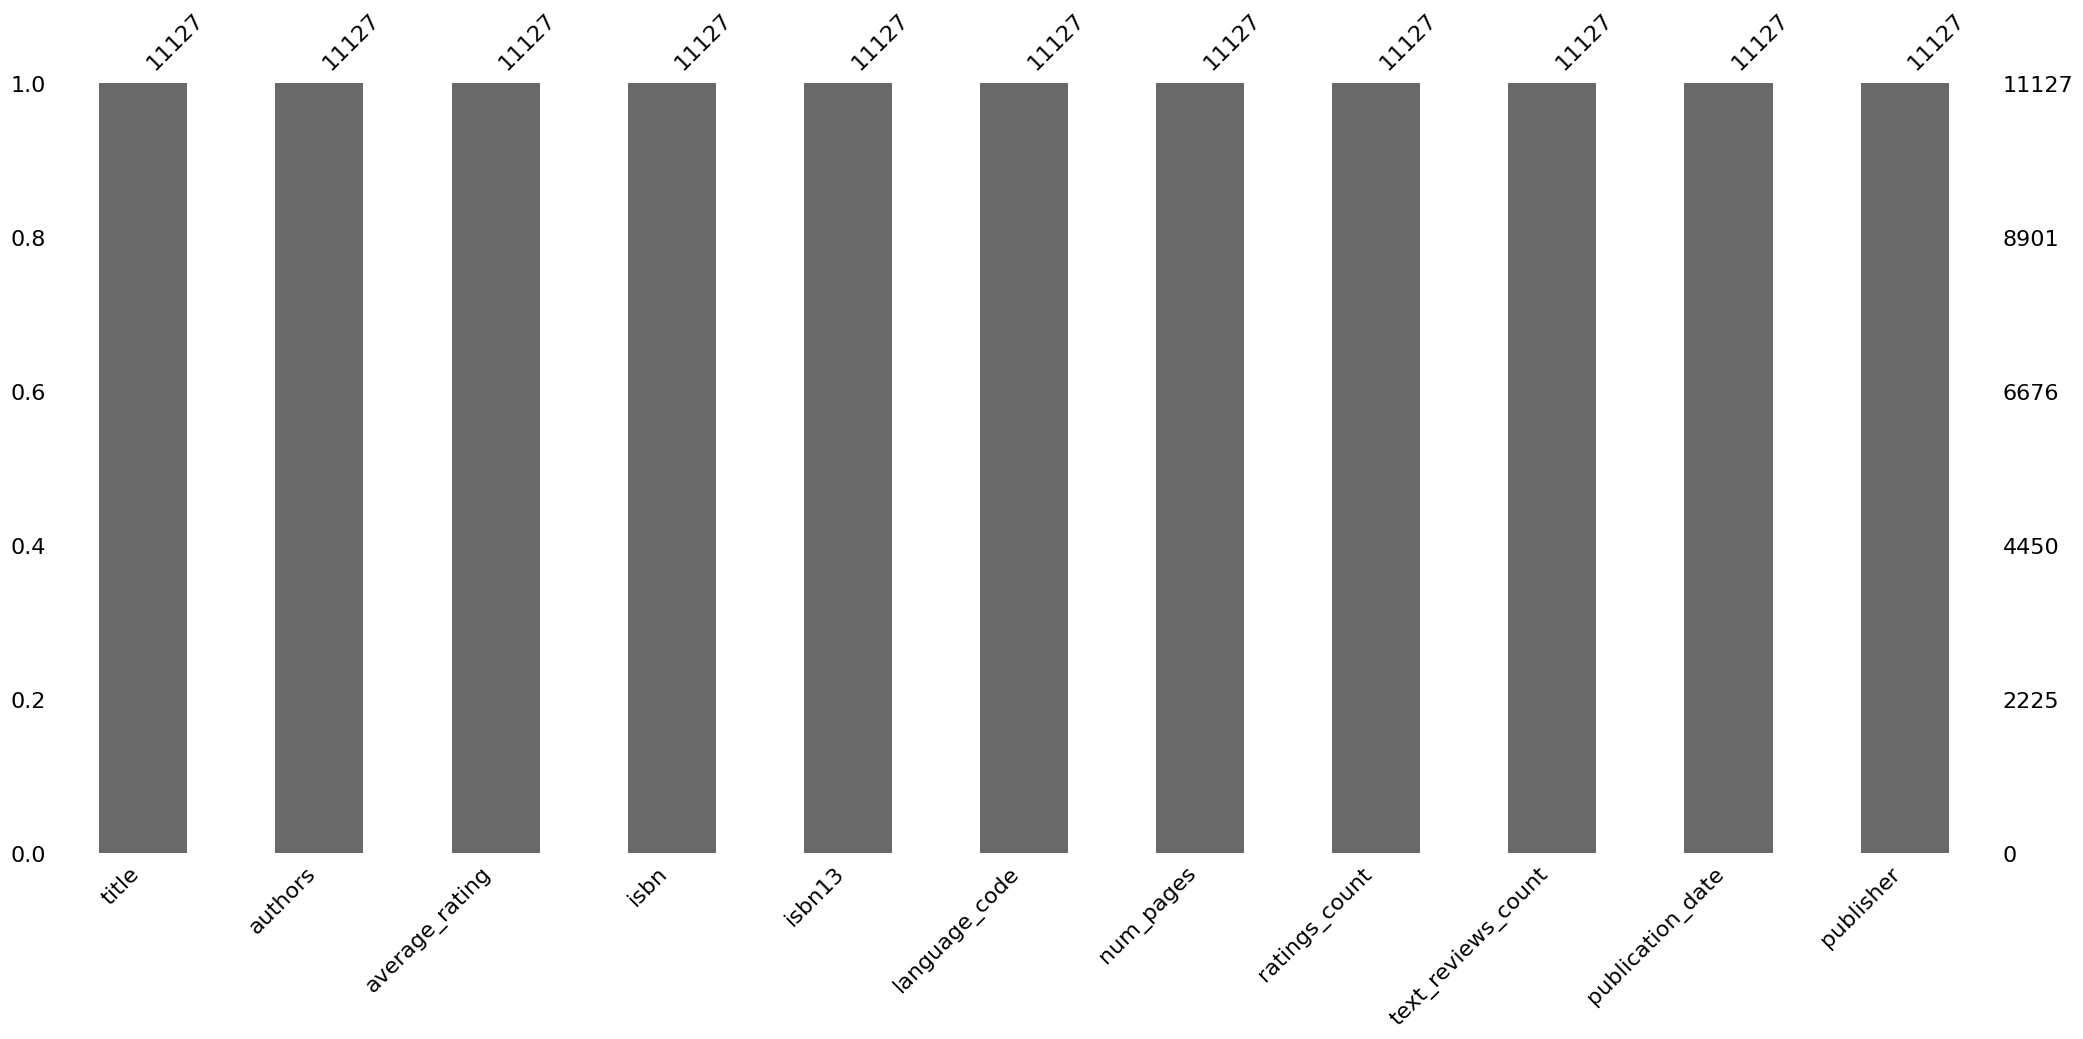

In [33]:
ms.bar(df);

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   isbn                11127 non-null  object
 4   isbn13              11127 non-null  object
 5   language_code       11127 non-null  object
 6   num_pages           11127 non-null  object
 7   ratings_count       11127 non-null  int64 
 8   text_reviews_count  11127 non-null  object
 9   publication_date    11127 non-null  object
 10  publisher           11127 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [35]:
#value = df.loc[12224]['text_reviews_count']
# Simplified function to convert string numbers to integers, non-numeric to 0
def convert_to_int(str_values):
    try:
        return int(str_values)
    except ValueError:
        return 0

# Apply the conversion function to the entire 'text_reviews_count' column
df['text_reviews_count'] = df['text_reviews_count'].apply(convert_to_int)

# Print the DataFrame after conversion
print("\nDataFrame after conversion:")
type(df.loc[12224]['text_reviews_count'])


DataFrame after conversion:


numpy.int64

In [36]:
df.loc[12224]

title                 Streetcar Suburbs: The Process of Growth in Bo...
authors                               Sam Bass Warner Jr./Sam B. Warner
average_rating                                                     3.58
isbn                                                          674842111
isbn13                                                         9.78E+12
language_code                                                     en-US
num_pages                                                           236
ratings_count                                                        61
text_reviews_count                                                    6
publication_date                                              4/20/2004
publisher                                      Harvard University Press
Name: 12224, dtype: object

In [37]:
df['num_pages'] = df['num_pages'].astype(int)

In [38]:
# Detect rows where 'num_pages' cannot be converted to a numeric value
non_numeric_rows = df[pd.to_numeric(df['num_pages'], errors='coerce').isna()]

# Print the rows with non-numeric 'num_pages' values
print("Rows with non-numeric 'num_pages' values:")
print(non_numeric_rows)

Rows with non-numeric 'num_pages' values:
Empty DataFrame
Columns: [title, authors, average_rating, isbn, isbn13, language_code, num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []


In [39]:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [40]:
df['language_code'].value_counts()

language_code
eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

#language_code grouping
eng, en-US, en_GB, en-CA, enm (English, Middle (1100-1500)
spa
fre
ger
jpn
mul
zho (chinese)
grc (ancient greek)
por
ita
lat
swe
rus
srp
nl (dutch)
msa (indo)
glg (galician)
wel
ara
nor
tur
gla (gaelic)
ale (Ethiopian)

In [41]:
df.language_code.replace(["eng","en-US","en-GB"],"eng", inplace=True)

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\3690286027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.language_code.replace(["eng","en-US","en-GB"],"eng", inplace=True)


In [42]:
#df.language_code.replace(["ara","nl","srp","msa","glg","wel","nor","tur","gla","ale","mul","zho","grc","por","en-CA","ita","enm","lat","rus","swe","jpn","ger"],"others", inplace=True)

In [43]:
df.language_code.replace(["ara","nl","srp","msa","glg","wel","nor","tur","gla","ale","mul","zho","grc","por","en-CA","ita","enm","lat","rus","swe","jpn","ger"],"others", inplace=True)

In [44]:
data_language_code=pd.get_dummies(df["language_code"],dtype=int)
data_language_code

,eng,fre,others,spa
bookID,,,,
1,1,0,0,0
2,1,0,0,0
4,1,0,0,0
5,1,0,0,0
8,1,0,0,0
...,...,...,...,...
45631,1,0,0,0
45633,1,0,0,0
45634,1,0,0,0


In [45]:
data_selection1=pd.concat([df,data_language_code],axis=1)
data_selection1.drop(["language_code"],axis=1, inplace=True)

In [46]:
data_selection1.head()

,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,eng,fre,others,spa
bookID,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,652,2095690,27591,9/16/2006,Scholastic Inc.,1,0,0,0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,870,2153167,29221,9/1/2004,Scholastic Inc.,1,0,0,0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,352,6333,244,11/1/2003,Scholastic,1,0,0,0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,435,2339585,36325,5/1/2004,Scholastic Inc.,1,0,0,0
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,2690,41428,164,9/13/2004,Scholastic,1,0,0,0


In [47]:
# Convert 'average_rating' to numeric
df['average_rating'] = pd.to_numeric(df['average_rating'])

type(df.loc[2]['average_rating'])


numpy.float64

In [48]:

# Find all unique types in the 'num_pages' column
unique_types = df['average_rating'].apply(type).unique()

# Print the unique types
print("Unique types in 'average_rating' column:")
for t in unique_types:
    print(t)

# Group by publisher and calculate the average rating
publisher_ratings = df.groupby('publisher')['average_rating'].mean().reset_index()

# Sort publishers by average rating in descending order
publisher_ratings = publisher_ratings.sort_values(by='average_rating', ascending=False)

# Print the top publishers by average rating
print(publisher_ratings.head(10))

Unique types in 'average_rating' column:
<class 'float'>
                            publisher  average_rating
1886            Square One Publishers             5.0
2248                          Y Lolfa             5.0
1957       Texas A&M University Press             5.0
462                     Courage Books             5.0
2069  University Press of New England             5.0
1770                   Schirmer Mosel             5.0
26                    Academica Press             5.0
1932                  T&T Clark Int'l             5.0
2105                    Vantage Press             5.0
311               Boosey & Hawkes Inc             5.0


In [49]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'average_rating' column to float
df['average_rating'] = df['average_rating'].astype(float)

# Verify the conversion by finding all unique types in the 'average_rating' column
unique_types = df['average_rating'].apply(type).unique()

# Print the unique types
print("Unique types in 'average_rating' column:")
for t in unique_types:
    print(t)

# Group by publisher and calculate the average rating
publisher_ratings = df.groupby('publisher')['average_rating'].mean().reset_index()

# Sort publishers by average rating in descending order
publisher_ratings = publisher_ratings.sort_values(by='average_rating', ascending=False)

# Print the top publishers by average rating
print(publisher_ratings.head(10))


Unique types in 'average_rating' column:
<class 'float'>
                            publisher  average_rating
1886            Square One Publishers             5.0
2248                          Y Lolfa             5.0
1957       Texas A&M University Press             5.0
462                     Courage Books             5.0
2069  University Press of New England             5.0
1770                   Schirmer Mosel             5.0
26                    Academica Press             5.0
1932                  T&T Clark Int'l             5.0
2105                    Vantage Press             5.0
311               Boosey & Hawkes Inc             5.0


In [50]:
# import chardet

# # Detect the encoding of a file
# with open('/Users/tanattiya/Desktop/DSTI/ML/Project1/books.csv', 'rb') as f:
#     result = chardet.detect(f.read())

# print(result)


In [51]:
#print(df[df['bookID'] == 22802])
df.iloc[6076:6090]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
22804,犬夜叉 12,Rumiko Takahashi,4.25,4091255825,9.78E+12,others,192,13,0,9/18/1999,小学館
22805,犬夜叉 17,Rumiko Takahashi,4.25,4091255876,9.78E+12,others,192,14,1,8/9/2000,小学館
22807,犬夜叉 14,Rumiko Takahashi,4.30,4091255841,9.78E+12,others,192,13,1,2/18/2000,小学館
22816,犬夜叉 10,Rumiko Takahashi,4.28,4091252109,9.78E+12,others,192,15,0,4/17/1999,小学館
22817,犬夜叉 1,Rumiko Takahashi,4.27,409125201X,9.78E+12,others,192,41,3,4/18/1997,小学館
22820,犬夜叉 27,Rumiko Takahashi,4.28,4091256473,9.78E+12,others,192,12,1,9/18/2002,小学館
22821,The Return of Lum Volume 3: Sweet Revenge (Ur...,Rumiko Takahashi,3.97,1569311935,9.78E+12,eng,216,32,1,3/8/1997,Viz Media
22822,The Return of Lum Volume 5: Feudal Furor (Uru...,Rumiko Takahashi,4.04,1569312109,9.78E+12,eng,200,27,0,12/6/1997,Viz Media
22826,Lamu: Urusei Yatsura 3,Rumiko Takahashi,4.08,8484497283,9.79E+12,spa,416,38,0,8/30/2005,Glénat


In [52]:
print(df.columns)


Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')


In [53]:
df.loc[22802:22810]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
22802,犬夜叉 22,Rumiko Takahashi,4.25,4091256422,9.78E+12,others,192,13,1,8/9/2001,小学館
22803,犬夜叉 26,Rumiko Takahashi,4.28,4091256465,9.78E+12,others,192,11,1,6/18/2002,小学館
22804,犬夜叉 12,Rumiko Takahashi,4.25,4091255825,9.78E+12,others,192,13,0,9/18/1999,小学館
22805,犬夜叉 17,Rumiko Takahashi,4.25,4091255876,9.78E+12,others,192,14,1,8/9/2000,小学館
22807,犬夜叉 14,Rumiko Takahashi,4.30,4091255841,9.78E+12,others,192,13,1,2/18/2000,小学館


In [54]:
#far left's indexing starts from 0
df.iloc[1]

title                 Harry Potter and the Order of the Phoenix (Har...
authors                                      J.K. Rowling/Mary GrandPré
average_rating                                                     4.49
isbn                                                          439358078
isbn13                                                         9.78E+12
language_code                                                       eng
num_pages                                                           870
ratings_count                                                   2153167
text_reviews_count                                                29221
publication_date                                               9/1/2004
publisher                                               Scholastic Inc.
Name: 2, dtype: object

In [55]:
#position of the index of the column set as index_col (this case = bookID)
df.loc[1]

title                 Harry Potter and the Half-Blood Prince (Harry ...
authors                                      J.K. Rowling/Mary GrandPré
average_rating                                                     4.57
isbn                                                          439785960
isbn13                                                         9.78E+12
language_code                                                       eng
num_pages                                                           652
ratings_count                                                   2095690
text_reviews_count                                                27591
publication_date                                              9/16/2006
publisher                                               Scholastic Inc.
Name: 1, dtype: object

In [56]:
type(df.loc[2]['average_rating'])

numpy.float64

Visualize the influence of publisher on average rating

In [57]:

# # Calculate the average rating for each publisher
# publisher_ratings = df.groupby('publisher')['average_rating'].mean().reset_index()

# # Sort publishers by average rating in descending order and select the top 50
# top_publishers = publisher_ratings.sort_values(by='average_rating', ascending=False).head(50)

# # Plot the average ratings by publisher for the top 50
# plt.figure(figsize=(10, 8))
# sns.barplot(x='average_rating', y='publisher', data=top_publishers)
# plt.title('Average Book Rating by Publisher (Top 50)')
# plt.xlabel('Average Rating')
# plt.ylabel('Publisher')
# plt.show()

# # Filter the original DataFrame to include only the top 50 publishers
# df_filtered = df[df['publisher'].isin(top_publishers['publisher'])]

# # Perform ANOVA test to see if the differences in ratings are statistically significant
# grouped_ratings = [group['average_rating'].values for name, group in df_filtered.groupby('publisher')]
# anova_result = f_oneway(*grouped_ratings)

# print(f"ANOVA test result: F={anova_result.statistic}, p={anova_result.pvalue}")

In [58]:
numerical_features = df.select_dtypes(exclude=["object"])

In [59]:
numerical_features

,average_rating,num_pages,ratings_count,text_reviews_count
bookID,,,,
1,4.57,652,2095690,27591
2,4.49,870,2153167,29221
4,4.42,352,6333,244
5,4.56,435,2339585,36325
8,4.78,2690,41428,164
...,...,...,...,...
45631,4.06,512,156,20
45633,4.08,635,783,56
45634,3.96,415,820,95


In [60]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      11127 non-null  float64
 1   num_pages           11127 non-null  int64  
 2   ratings_count       11127 non-null  int64  
 3   text_reviews_count  11127 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 692.7 KB


In [61]:
df.head(50)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9.78E+12,eng,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.78E+12,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9.78E+12,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9.78E+12,eng,815,249558,4080,4/30/2002,Del Rey Books


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  object 
 5   language_code       11127 non-null  object 
 6   num_pages           11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


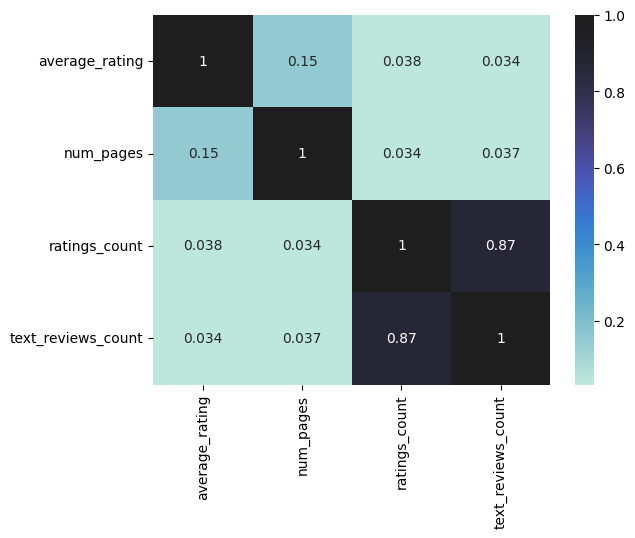

In [63]:
sns.heatmap(numerical_features.corr(),annot=True,center=True);

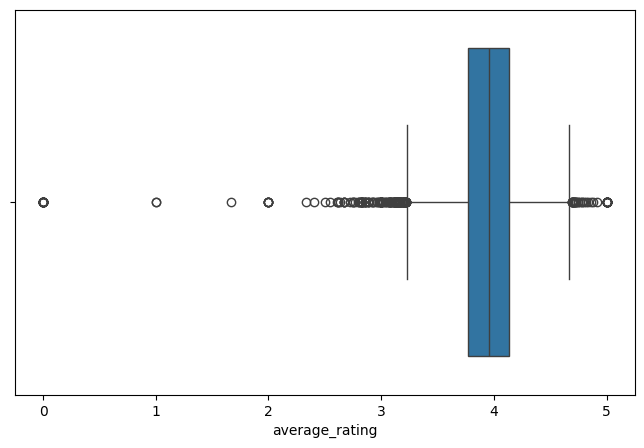

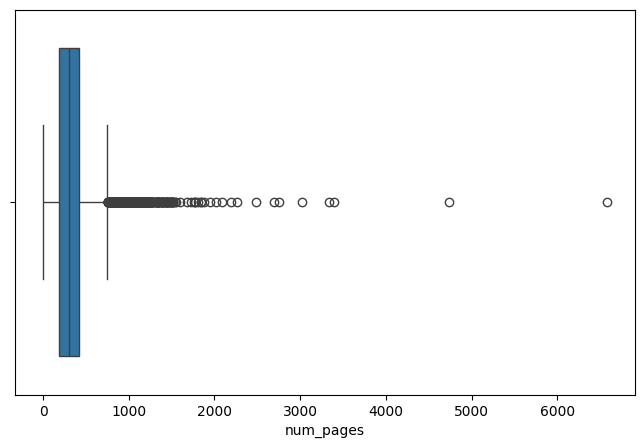

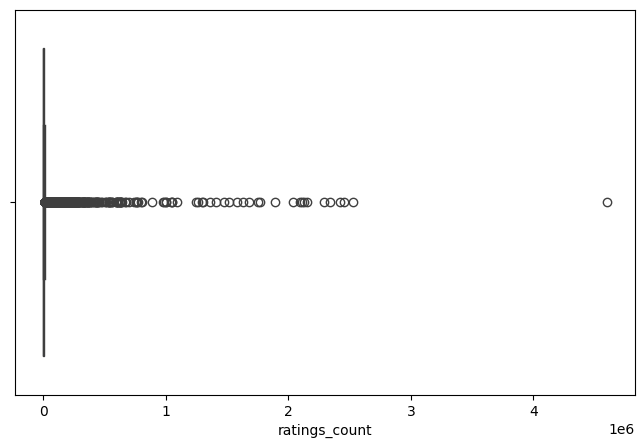

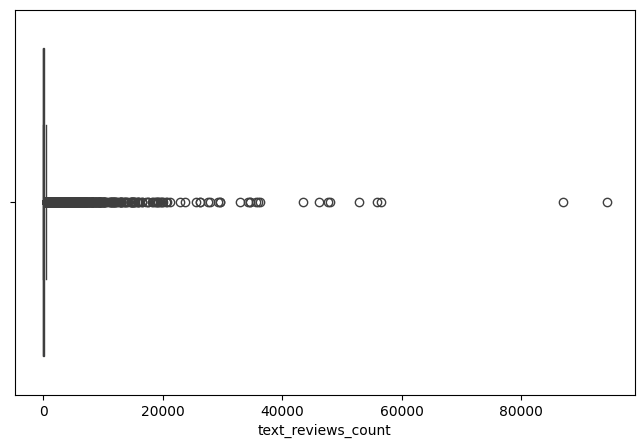

In [64]:
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=numerical_features[feature]);

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\1825105649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_features[feature],bins=5);
C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\1825105649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_features[featur

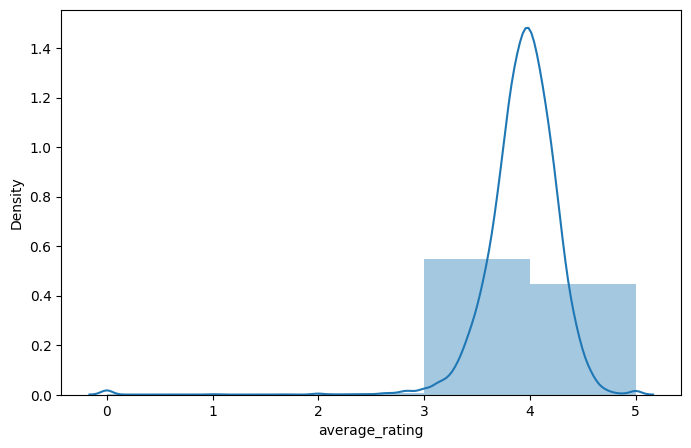

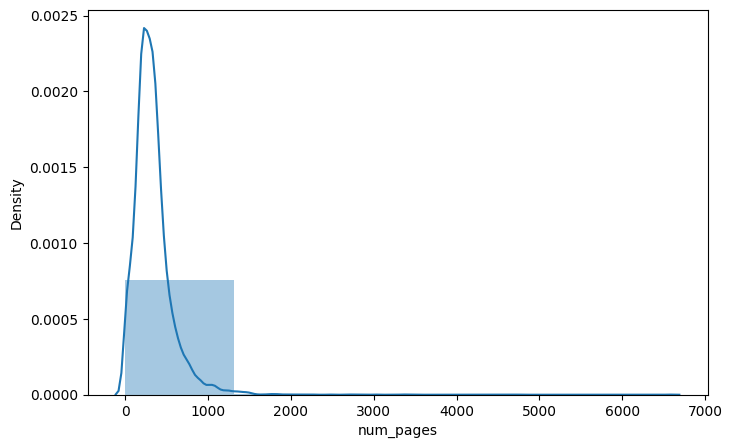

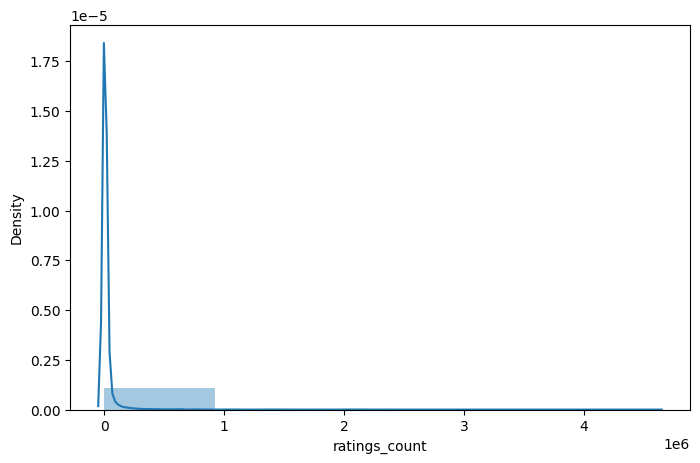

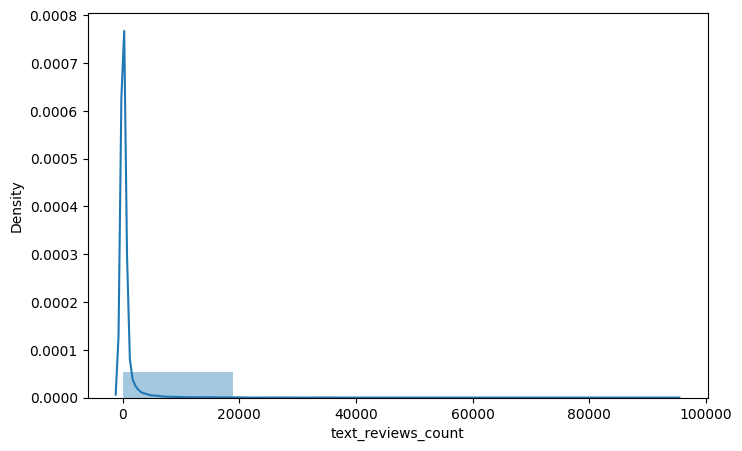

In [65]:
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.distplot(numerical_features[feature],bins=5);

In [66]:
target = numerical_features["average_rating"]

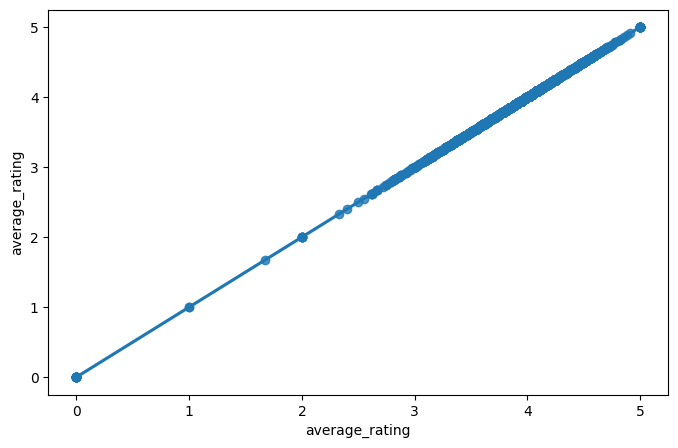

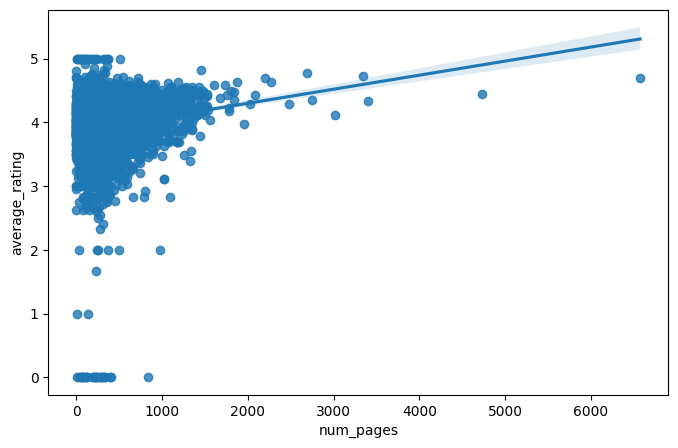

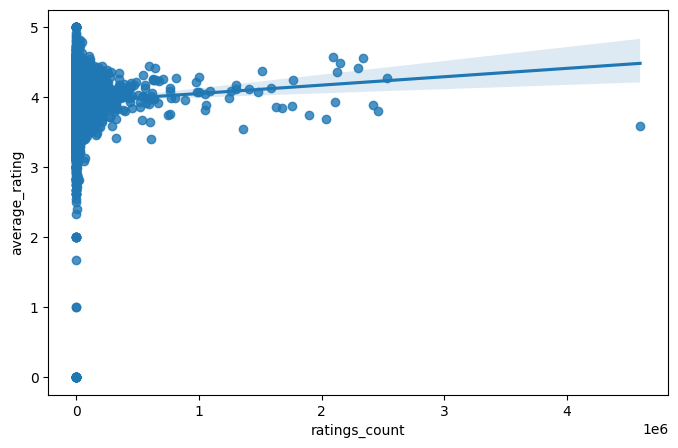

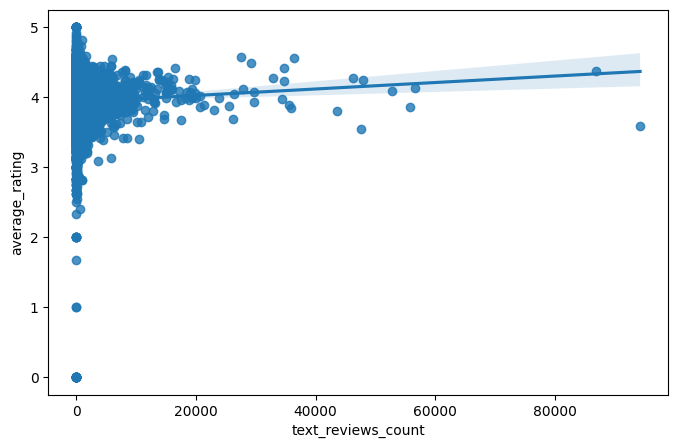

In [67]:
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.regplot(x=numerical_features[feature],y=target,data=numerical_features);

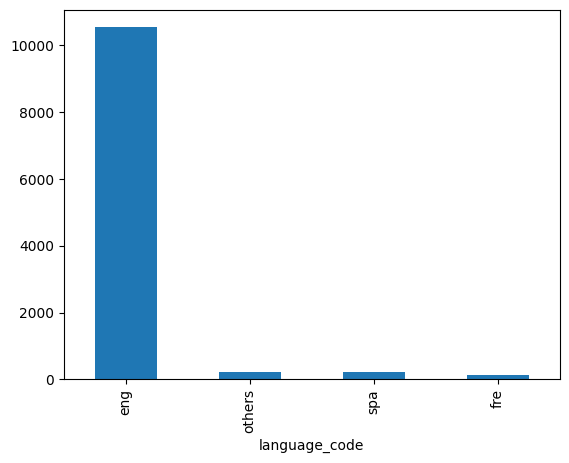

In [68]:
df.language_code.value_counts().plot.bar();
#(autopct="%.1f%%",shadow=True,legend=True,figsize=(15,8));

In [69]:
#df.publisher.value_counts().plot.bar(figsize=(20,6));

In [70]:
# # Let's look at the top 10 rated books
# top10Books = df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
# plot_dims = (12, 8)
# fig, ax = plt.subplots(figsize=plot_dims)
# sns.barplot(top10Books, top10Books.index)

# for i in ax.patches:
#     ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
# plt.show()

In [71]:
df.query("authors=='Bill Bryson'")

# Select the top 10 books using query function in combination with 
top_10_books = df.nlargest(10, 'average_rating').query('index >= 0')

top_10_books

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,198145047,9.78E+12,others,364,0,0,2/22/1922,Oxford University Press USA
2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9.78E+12,eng,83,1,0,9/1/2006,Schirmer Mosel
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,439271711,9.78E+12,eng,32,4,1,1/1/2002,Teaching Resources
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,738511676,9.78E+12,eng,128,2,0,3/17/2003,Arcadia Publishing
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,744002354,9.78E+12,eng,128,2,0,3/6/2003,BradyGames
17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9.78E+12,eng,74,5,3,2/1/2006,Square One Publishers
17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,533017424,9.78E+12,eng,202,4,0,1/1/1975,Vantage Press
18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,851621813,9.78E+12,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,563388692,9.78E+12,eng,2,3,0,4/1/1996,BBC Physical Audio


In [72]:
df[["title","average_rating"]].query("average_rating==5.0")

,title,average_rating
bookID,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,5.0
2560,Willem de Kooning: Late Paintings,5.0
2843,Literature Circle Guide: Bridge to Terabithia:...,5.0
4287,Middlesex Borough (Images of America: New Jersey),5.0
14741,Zone of the Enders: The 2nd Runner Official St...,5.0
17224,The Diamond Color Meditation: Color Pathway to...,5.0
17830,Bulgakov's the Master and Margarita: The Text ...,5.0
18184,The Complete Theory Fun Factory: Music Theory ...,5.0
19786,The Goon Show Volume 4: My Knees Have Fallen ...,5.0


In [73]:
for i in df.columns:
    print(i,df[i].duplicated().sum())

title 775
authors 4484
average_rating 10918
isbn 0
isbn13 11104
language_code 11123
num_pages 10130
ratings_count 5833
text_reviews_count 9305
publication_date 7448
publisher 8835


In [74]:
df.nunique()

title                 10352
authors                6643
average_rating          209
isbn                  11127
isbn13                   23
language_code             4
num_pages               997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2292
dtype: int64

In [75]:
775+10352

11127

In [76]:
df[df.authors=="Don DeLillo"].count()

title                 14
authors               14
average_rating        14
isbn                  14
isbn13                14
language_code         14
num_pages             14
ratings_count         14
text_reviews_count    14
publication_date      14
publisher             14
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df_time_series = numerical_features.copy()
df_time_series.head()

,average_rating,num_pages,ratings_count,text_reviews_count
bookID,,,,
1,4.57,652,2095690,27591
2,4.49,870,2153167,29221
4,4.42,352,6333,244
5,4.56,435,2339585,36325
8,4.78,2690,41428,164


In [79]:
df_time_series["date"]=df["publication_date"]
df_time_series.head()

,average_rating,num_pages,ratings_count,text_reviews_count,date
bookID,,,,,
1,4.57,652,2095690,27591,9/16/2006
2,4.49,870,2153167,29221,9/1/2004
4,4.42,352,6333,244,11/1/2003
5,4.56,435,2339585,36325,5/1/2004
8,4.78,2690,41428,164,9/13/2004


In [80]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   average_rating      11127 non-null  float64
 1   num_pages           11127 non-null  int64  
 2   ratings_count       11127 non-null  int64  
 3   text_reviews_count  11127 non-null  int64  
 4   date                11127 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 779.6+ KB


In [81]:
# If you know the format of your dates, specify it
# Example format: 'dd/mm/yyyy' or 'yyyy-mm-dd'
date_format = '%m/%d/%Y'  # Adjust this format to your needs
df_time_series["date"] = pd.to_datetime(df_time_series["date"], format=date_format, errors='coerce')

In [82]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   average_rating      11127 non-null  float64       
 1   num_pages           11127 non-null  int64         
 2   ratings_count       11127 non-null  int64         
 3   text_reviews_count  11127 non-null  int64         
 4   date                11125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 779.6 KB


In [83]:
df_time_series["date"].isna().sum()

np.int64(2)

In [84]:
4555+6572

11127

In [85]:
df_time_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   average_rating      11127 non-null  float64       
 1   num_pages           11127 non-null  int64         
 2   ratings_count       11127 non-null  int64         
 3   text_reviews_count  11127 non-null  int64         
 4   date                11125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 779.6 KB


In [86]:
df_time_series.head()

,average_rating,num_pages,ratings_count,text_reviews_count,date
bookID,,,,,
1,4.57,652,2095690,27591,2006-09-16
2,4.49,870,2153167,29221,2004-09-01
4,4.42,352,6333,244,2003-11-01
5,4.56,435,2339585,36325,2004-05-01
8,4.78,2690,41428,164,2004-09-13


In [87]:
df_time_series.set_index(df_time_series["date"],inplace=True)
df_time_series.sort_index(inplace=True)

In [88]:
df_time_series.head()

,average_rating,num_pages,ratings_count,text_reviews_count,date
date,,,,,
1900-01-01,3.88,144,332,33,1900-01-01
1913-01-01,3.96,448,111,11,1913-01-01
1914-01-01,3.95,384,87,7,1914-01-01
1919-01-01,4.32,496,208,7,1919-01-01
1921-01-01,3.93,464,21,2,1921-01-01


In [89]:
df_time_series.drop("date",axis=1,inplace=True)
df_time_series.head()

,average_rating,num_pages,ratings_count,text_reviews_count
date,,,,
1900-01-01,3.88,144,332,33
1913-01-01,3.96,448,111,11
1914-01-01,3.95,384,87,7
1919-01-01,4.32,496,208,7
1921-01-01,3.93,464,21,2


C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\159690597.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_series["average_rating"].resample('M').mean().plot();


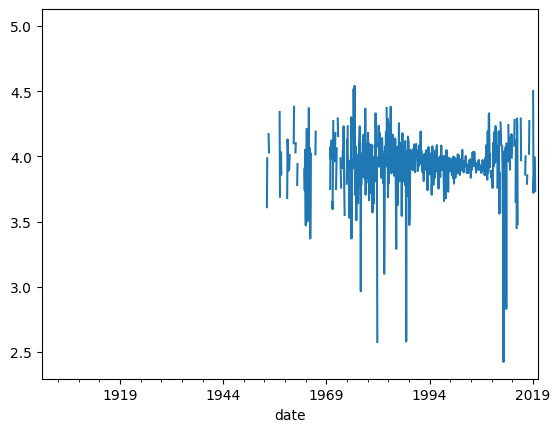

In [90]:
df_time_series["average_rating"].resample('M').mean().plot();

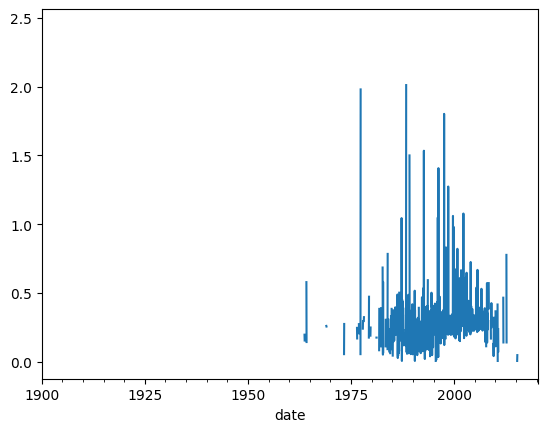

In [91]:
df_time_series["average_rating"].resample('2W').std().plot();

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\873587093.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_series["num_pages"].resample('M').mean().plot();


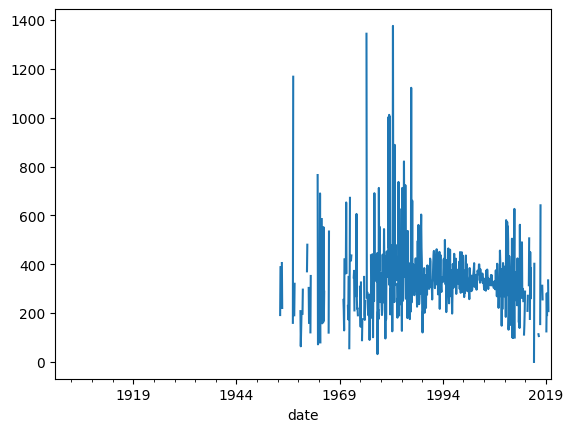

In [92]:
df_time_series["num_pages"].resample('M').mean().plot();

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\909788867.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time_series["ratings_count"].resample('Y').mean().plot();


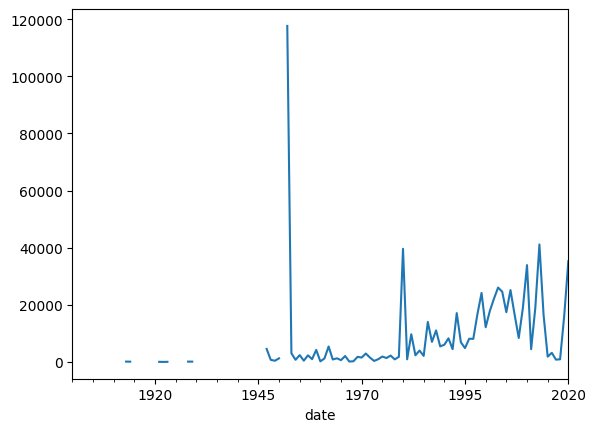

In [93]:
df_time_series["ratings_count"].resample('Y').mean().plot();

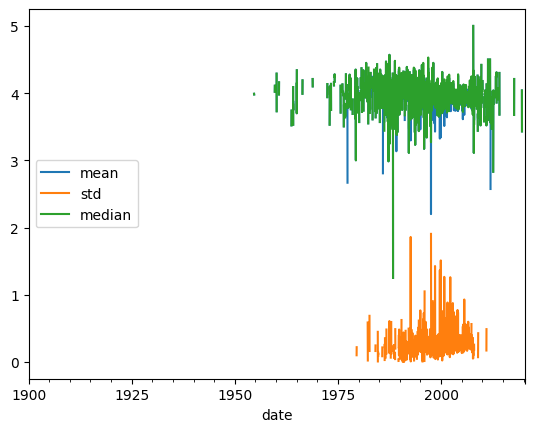

In [94]:
df_time_series["average_rating"].resample('W').agg(["mean","std","median"]).plot();

C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\1805238943.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time_series["text_reviews_count"].resample('Y').agg(["mean","std","median"]).plot();


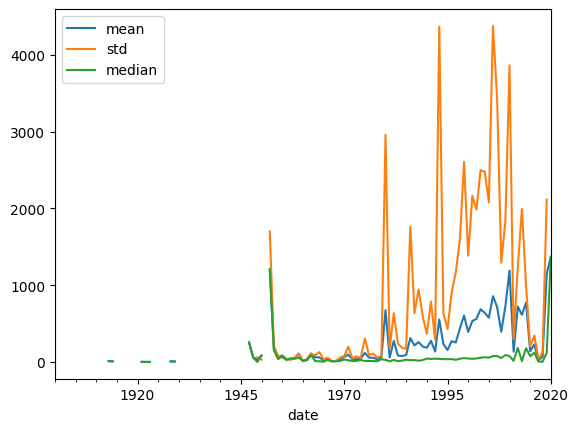

In [95]:
df_time_series["text_reviews_count"].resample('Y').agg(["mean","std","median"]).plot();

In [96]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, silhouette_visualizer
from sklearn.cluster import KMeans

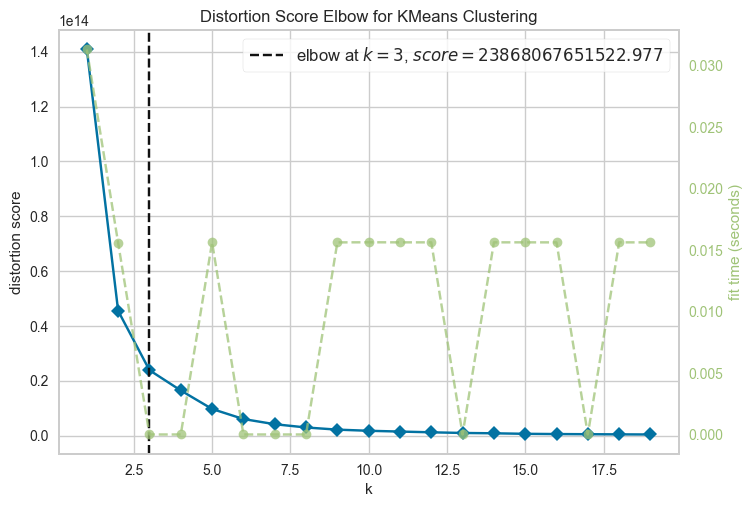

In [97]:
kms=KMeans(random_state=42,n_init='auto')
viz=KElbowVisualizer(kms,k=(1,20))
viz.fit(numerical_features)
viz.show();

In [98]:
model=KMeans(n_clusters=3,random_state=42)
y_prediction=model.fit_predict(numerical_features)

In [99]:
y_prediction

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

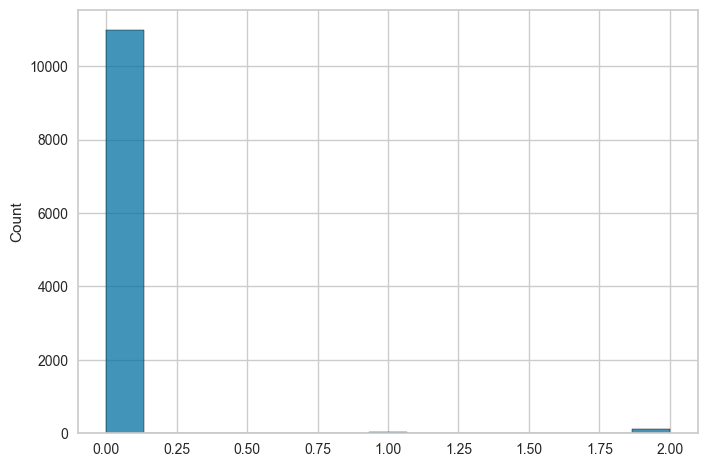

In [100]:
sns.histplot(x=y_prediction);

In [101]:
numerical_features["clusters"]=y_prediction
numerical_features.head()

,average_rating,num_pages,ratings_count,text_reviews_count,clusters
bookID,,,,,
1,4.57,652,2095690,27591,1
2,4.49,870,2153167,29221,1
4,4.42,352,6333,244,0
5,4.56,435,2339585,36325,1
8,4.78,2690,41428,164,0


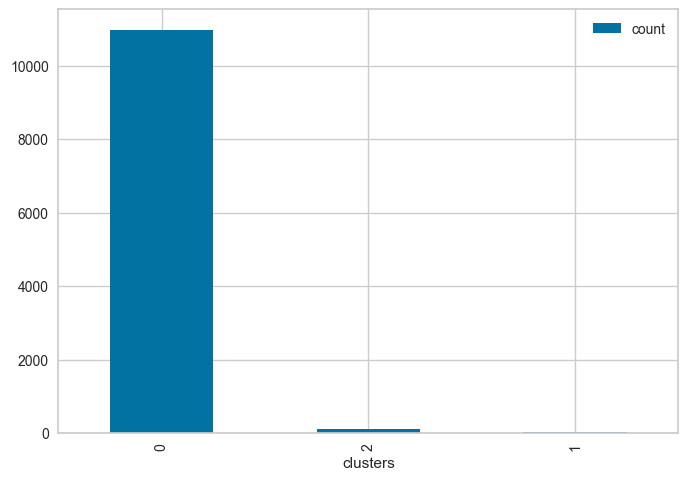

In [102]:
numerical_features["clusters"].value_counts().plot.bar().legend();

In [103]:
df0=numerical_features[numerical_features.clusters==0]
df1=numerical_features[numerical_features.clusters==1]
df2=numerical_features[numerical_features.clusters==2]

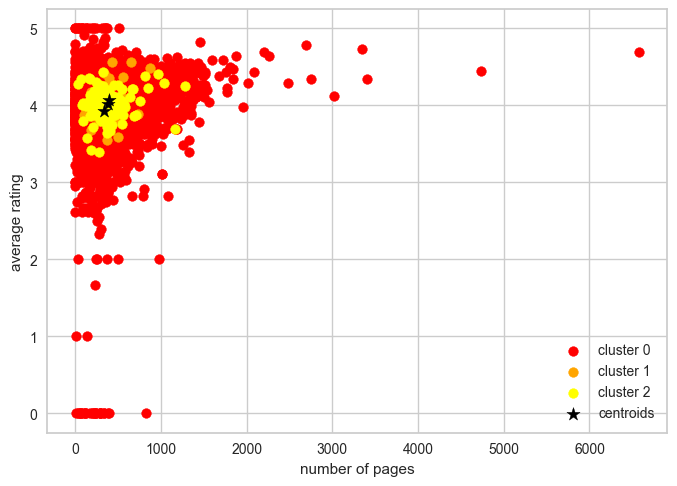

In [104]:
plt.scatter(df0.num_pages,df0.average_rating,color="red",label="cluster 0")
plt.scatter(df1.num_pages,df1.average_rating,color="orange",label="cluster 1")
plt.scatter(df2.num_pages,df2.average_rating,color="yellow",label="cluster 2")
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,0],s=100,marker="*",label="centroids",color="black")
plt.xlabel("number of pages")
plt.ylabel("average rating")
plt.legend()
plt.show()

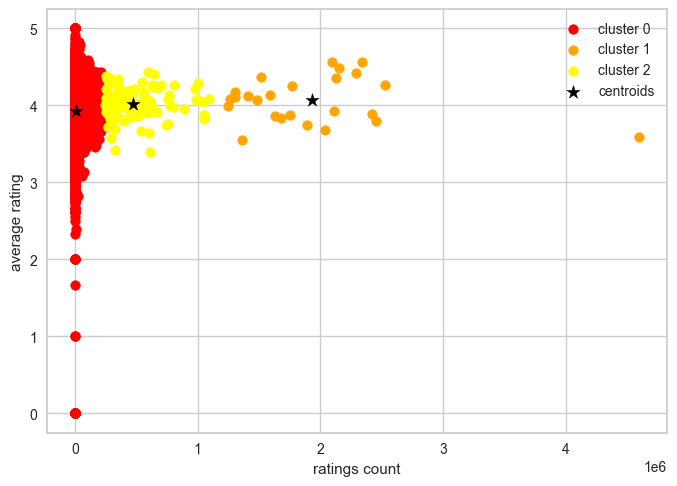

In [105]:
plt.scatter(df0.ratings_count,df0.average_rating,color="red",label="cluster 0")
plt.scatter(df1.ratings_count,df1.average_rating,color="orange",label="cluster 1")
plt.scatter(df2.ratings_count,df2.average_rating,color="yellow",label="cluster 2")
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,0],s=100,marker="*",label="centroids",color="black")
plt.xlabel("ratings count")
plt.ylabel("average rating")
plt.legend()
plt.show()

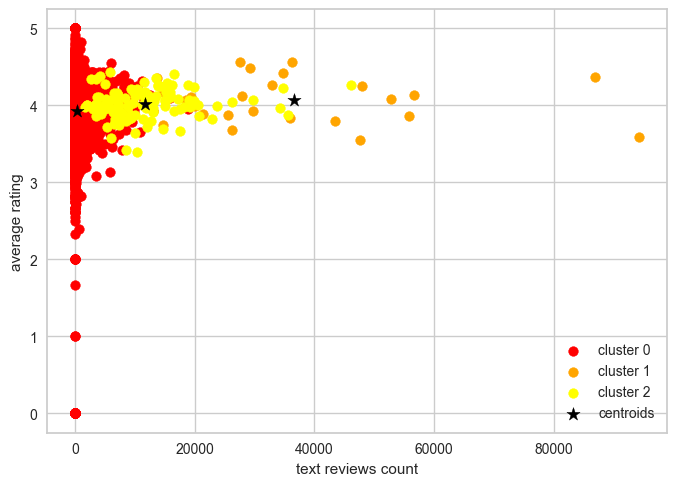

In [106]:
plt.scatter(df0.text_reviews_count,df0.average_rating,color="red",label="cluster 0")
plt.scatter(df1.text_reviews_count,df1.average_rating,color="orange",label="cluster 1")
plt.scatter(df2.text_reviews_count,df2.average_rating,color="yellow",label="cluster 2")
plt.scatter(model.cluster_centers_[:,3],model.cluster_centers_[:,0],s=100,marker="*",label="centroids",color="black")
plt.xlabel("text reviews count")
plt.ylabel("average rating")
plt.legend()
plt.show()

In [107]:
X=numerical_features.drop("clusters",axis=1)
#silhouette_visualizer(model, df_silhouette, colors='yellowbrick')

In [108]:
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer
from sklearn.cluster import KMeans

C:\Users\tanattiya\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


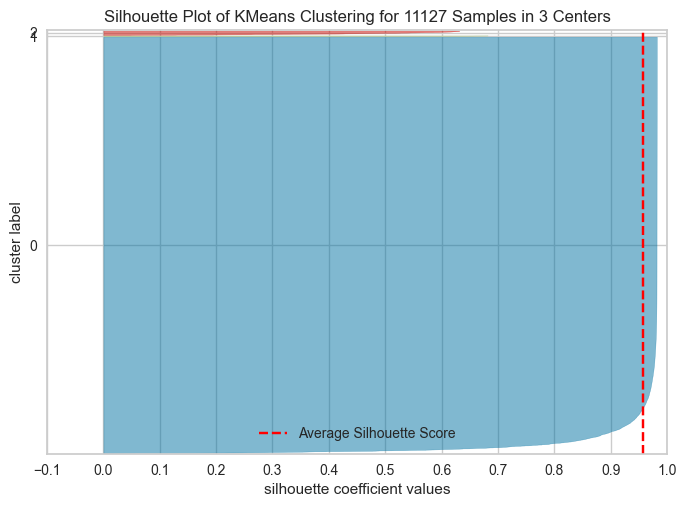

In [109]:
vz = SilhouetteVisualizer(model,colors='yellowbrick')
vz.fit(X)
vz.show();

In [110]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9.78E+12,eng,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.78E+12,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9.78E+12,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9.78E+12,eng,815,249558,4080,4/30/2002,Del Rey Books


In [111]:
future_data=df.copy()

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  object 
 5   language_code       11127 non-null  object 
 6   num_pages           11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [114]:
df.language_code.value_counts()

language_code
eng       10534
others      231
spa         218
fre         144
Name: count, dtype: int64

In [115]:
df_language_code=pd.get_dummies(df["language_code"],dtype=int)
df_language_code

,eng,fre,others,spa
bookID,,,,
1,1,0,0,0
2,1,0,0,0
4,1,0,0,0
5,1,0,0,0
8,1,0,0,0
...,...,...,...,...
45631,1,0,0,0
45633,1,0,0,0
45634,1,0,0,0


In [116]:

# Step 1: Split the DataFrame into two halves
mid_index = len(df) // 2
train_half = df.iloc[:mid_index].copy()
test_half = df.iloc[mid_index:].copy()

# Step 2: Add a label to distinguish between train and test data
train_half["Label"] = "train"
test_half["Label"] = "test"

# Step 3: Combine the two halves into one DataFrame
combined_data = pd.concat([train_half, test_half], axis=0)



In [117]:
combined_df = df.copy()

In [118]:
data_selection1.drop(["title","isbn","isbn13","authors","publisher"],axis=1,inplace=True)

In [119]:
#BAS
#use df to FE by 1. publication -> datetimetype -> pub_year


date_format = '%m/%d/%Y'  # Adjust this format to your needs
data_selection1['publication_date'] = pd.to_datetime(data_selection1['publication_date'], format=date_format, errors='coerce')
data_selection1['publication_year'] = data_selection1['publication_date'].dt.year

In [120]:
data_selection1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   average_rating      11127 non-null  object        
 1   num_pages           11127 non-null  int64         
 2   ratings_count       11127 non-null  int64         
 3   text_reviews_count  11127 non-null  int64         
 4   publication_date    11125 non-null  datetime64[ns]
 5   eng                 11127 non-null  int64         
 6   fre                 11127 non-null  int64         
 7   others              11127 non-null  int64         
 8   spa                 11127 non-null  int64         
 9   publication_year    11125 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 1.2+ MB


In [121]:
print(data_selection1['publication_year'].dtype)


float64


In [122]:
combined_df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic


In [123]:
data_selection1.drop("publication_date",axis=1,inplace=True)

In [124]:
# Assuming df_combined is your DataFrame
# First, coerce errors to NaT to identify problematic entries
# Check for NaT values to identify problematic entries
problematic_rows = data_selection1[data_selection1["publication_year"].isna()]

# Inspect problematic rows to understand the issue
problematic_rows

# Further troubleshoot and correct the data as necessary
# Calculate the mean of the publication_year column, excluding any zeros
mean_publication_year = data_selection1['publication_year'][data_selection1['publication_year'] != 0].mean()

# Fill missing values and zeros in the publication_year column with the mean
data_selection1['publication_year'].replace(0, np.nan, inplace=True)
data_selection1['publication_year'].fillna(mean_publication_year, inplace=True)

# Verify the changes
data_selection1['publication_year'].head(10)


C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\537841767.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selection1['publication_year'].replace(0, np.nan, inplace=True)
C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\537841767.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

bookID
1     2006.0
2     2004.0
4     2003.0
5     2004.0
8     2004.0
9     2005.0
10    2005.0
12    2005.0
13    2002.0
14    2004.0
Name: publication_year, dtype: float64

In [125]:
# Assuming df_combined is your DataFrame
# First, coerce errors to NaT to identify problematic entries
# Check for NaT values to identify problematic entries
problematic_rows = data_selection1[data_selection1["publication_year"].isna()]

# Inspect problematic rows to understand the issue
problematic_rows

# Further troubleshoot and correct the data as necessary
# Calculate the mean of the publication_year column, excluding any zeros
mean_publication_year = data_selection1['publication_year'][data_selection1['publication_year'] != 0].mean()

# Fill missing values and zeros in the publication_year column with the mean
data_selection1['publication_year'].replace(0, np.nan, inplace=True)
data_selection1['publication_year'].fillna(mean_publication_year, inplace=True)

# Verify the changes
data_selection1['publication_year'].head(10)



C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\3649769519.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selection1['publication_year'].replace(0, np.nan, inplace=True)
C:\Users\tanattiya\AppData\Local\Temp\ipykernel_11336\3649769519.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

bookID
1     2006.0
2     2004.0
4     2003.0
5     2004.0
8     2004.0
9     2005.0
10    2005.0
12    2005.0
13    2002.0
14    2004.0
Name: publication_year, dtype: float64

In [126]:
problematic_rows = data_selection1[data_selection1["publication_year"].isna()]

# Inspect problematic rows to understand the issue
problematic_rows

,average_rating,num_pages,ratings_count,text_reviews_count,eng,fre,others,spa,publication_year
bookID,,,,,,,,,


BAS

In [127]:
data_selection1.reset_index(drop=True,inplace=True)

In [128]:
data_selection1.head()

,average_rating,num_pages,ratings_count,text_reviews_count,eng,fre,others,spa,publication_year
0,4.57,652,2095690,27591,1,0,0,0,2006.0
1,4.49,870,2153167,29221,1,0,0,0,2004.0
2,4.42,352,6333,244,1,0,0,0,2003.0
3,4.56,435,2339585,36325,1,0,0,0,2004.0
4,4.78,2690,41428,164,1,0,0,0,2004.0


In [129]:
data_selection1.to_csv("data_selection1.csv")

In [130]:

# Extract numerical, discrete, continuous, and categorical features
numerical_features = [col for col in combined_df.columns if combined_df[col].dtype != 'O']
discrete_features = [col for col in numerical_features if len(combined_df[col].unique()) < 25 and col not in ['bookID']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ['bookID']]
categorical_features = [col for col in combined_df.columns if combined_df[col].dtype == 'O']

# Print the results
print("Total Number of Numerical Columns: ", len(numerical_features))
print("Number of Discrete Features: ", len(discrete_features))
print("Number of Continuous Features: ", len(continuous_features))
print("Number of Categorical Features: ", len(categorical_features))


Total Number of Numerical Columns:  4
Number of Discrete Features:  0
Number of Continuous Features:  4
Number of Categorical Features:  7


In [131]:
data_selection1.head()

,average_rating,num_pages,ratings_count,text_reviews_count,eng,fre,others,spa,publication_year
0,4.57,652,2095690,27591,1,0,0,0,2006.0
1,4.49,870,2153167,29221,1,0,0,0,2004.0
2,4.42,352,6333,244,1,0,0,0,2003.0
3,4.56,435,2339585,36325,1,0,0,0,2004.0
4,4.78,2690,41428,164,1,0,0,0,2004.0


# Ensure discrete_features is already defined
fig, axes = plt.subplots(2, 6, figsize=(30, 10), sharex=False)

for i, feature in enumerate(discrete_features):
    sns.histplot(data=combined_data, x=feature, hue="Label", ax=axes[i//6, i%6])

plt.tight_layout()
plt.show()

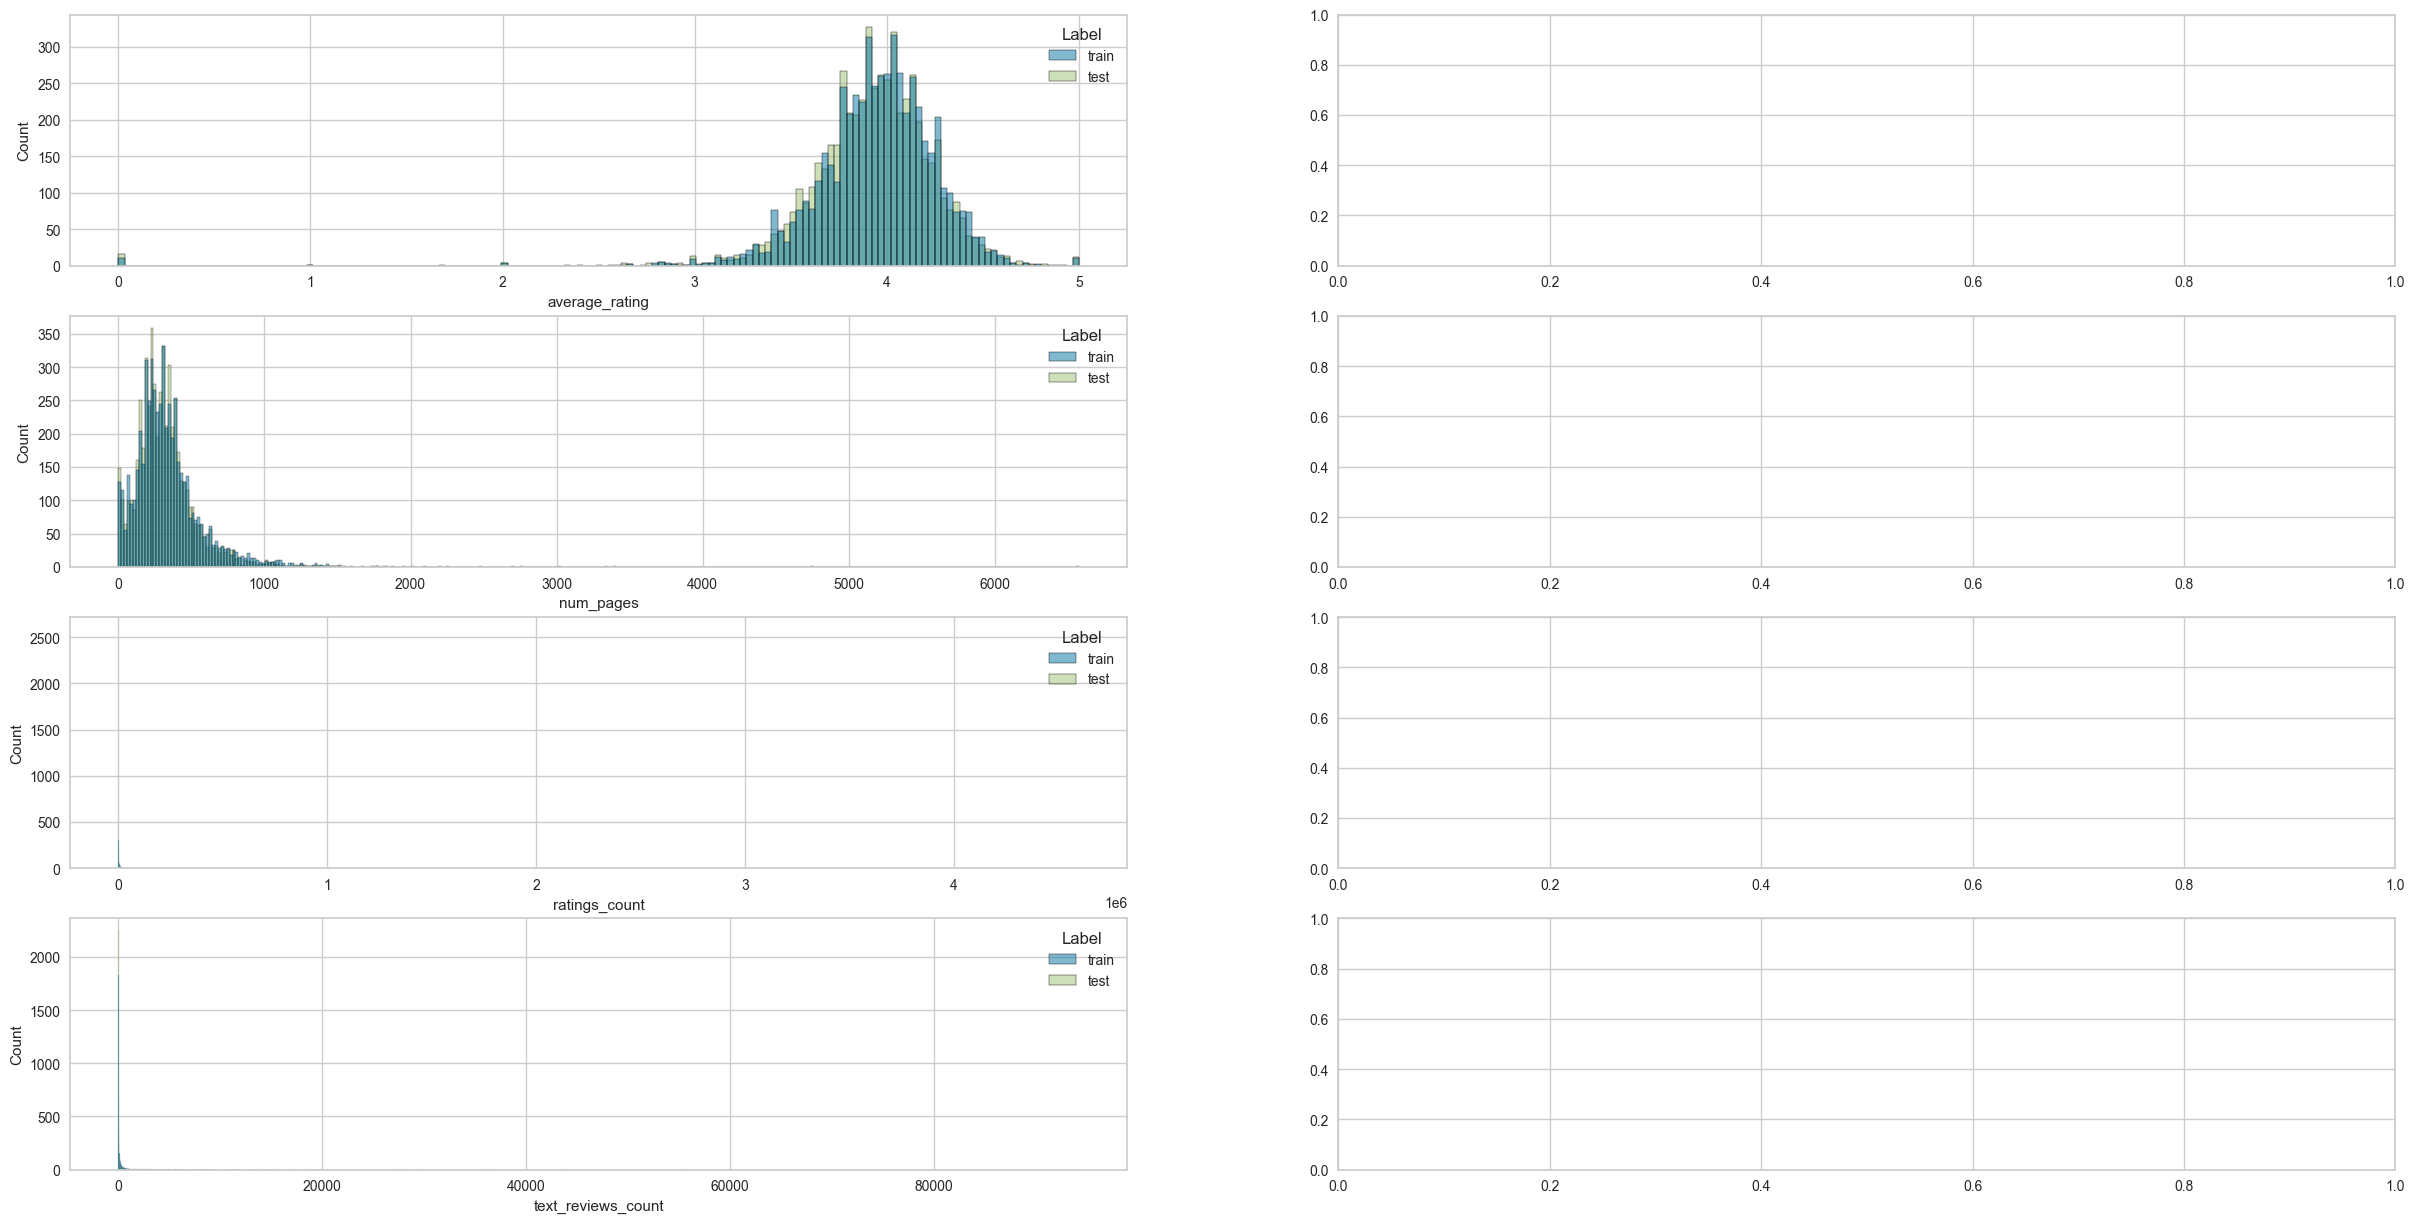

In [132]:
f, axes = plt.subplots(4,2 , figsize=(30, 15), sharex=False)
for i, feature in enumerate(continuous_features):
    sns.histplot(data=combined_data, x = feature, hue="Label",ax=axes[i%4, i//4]) 

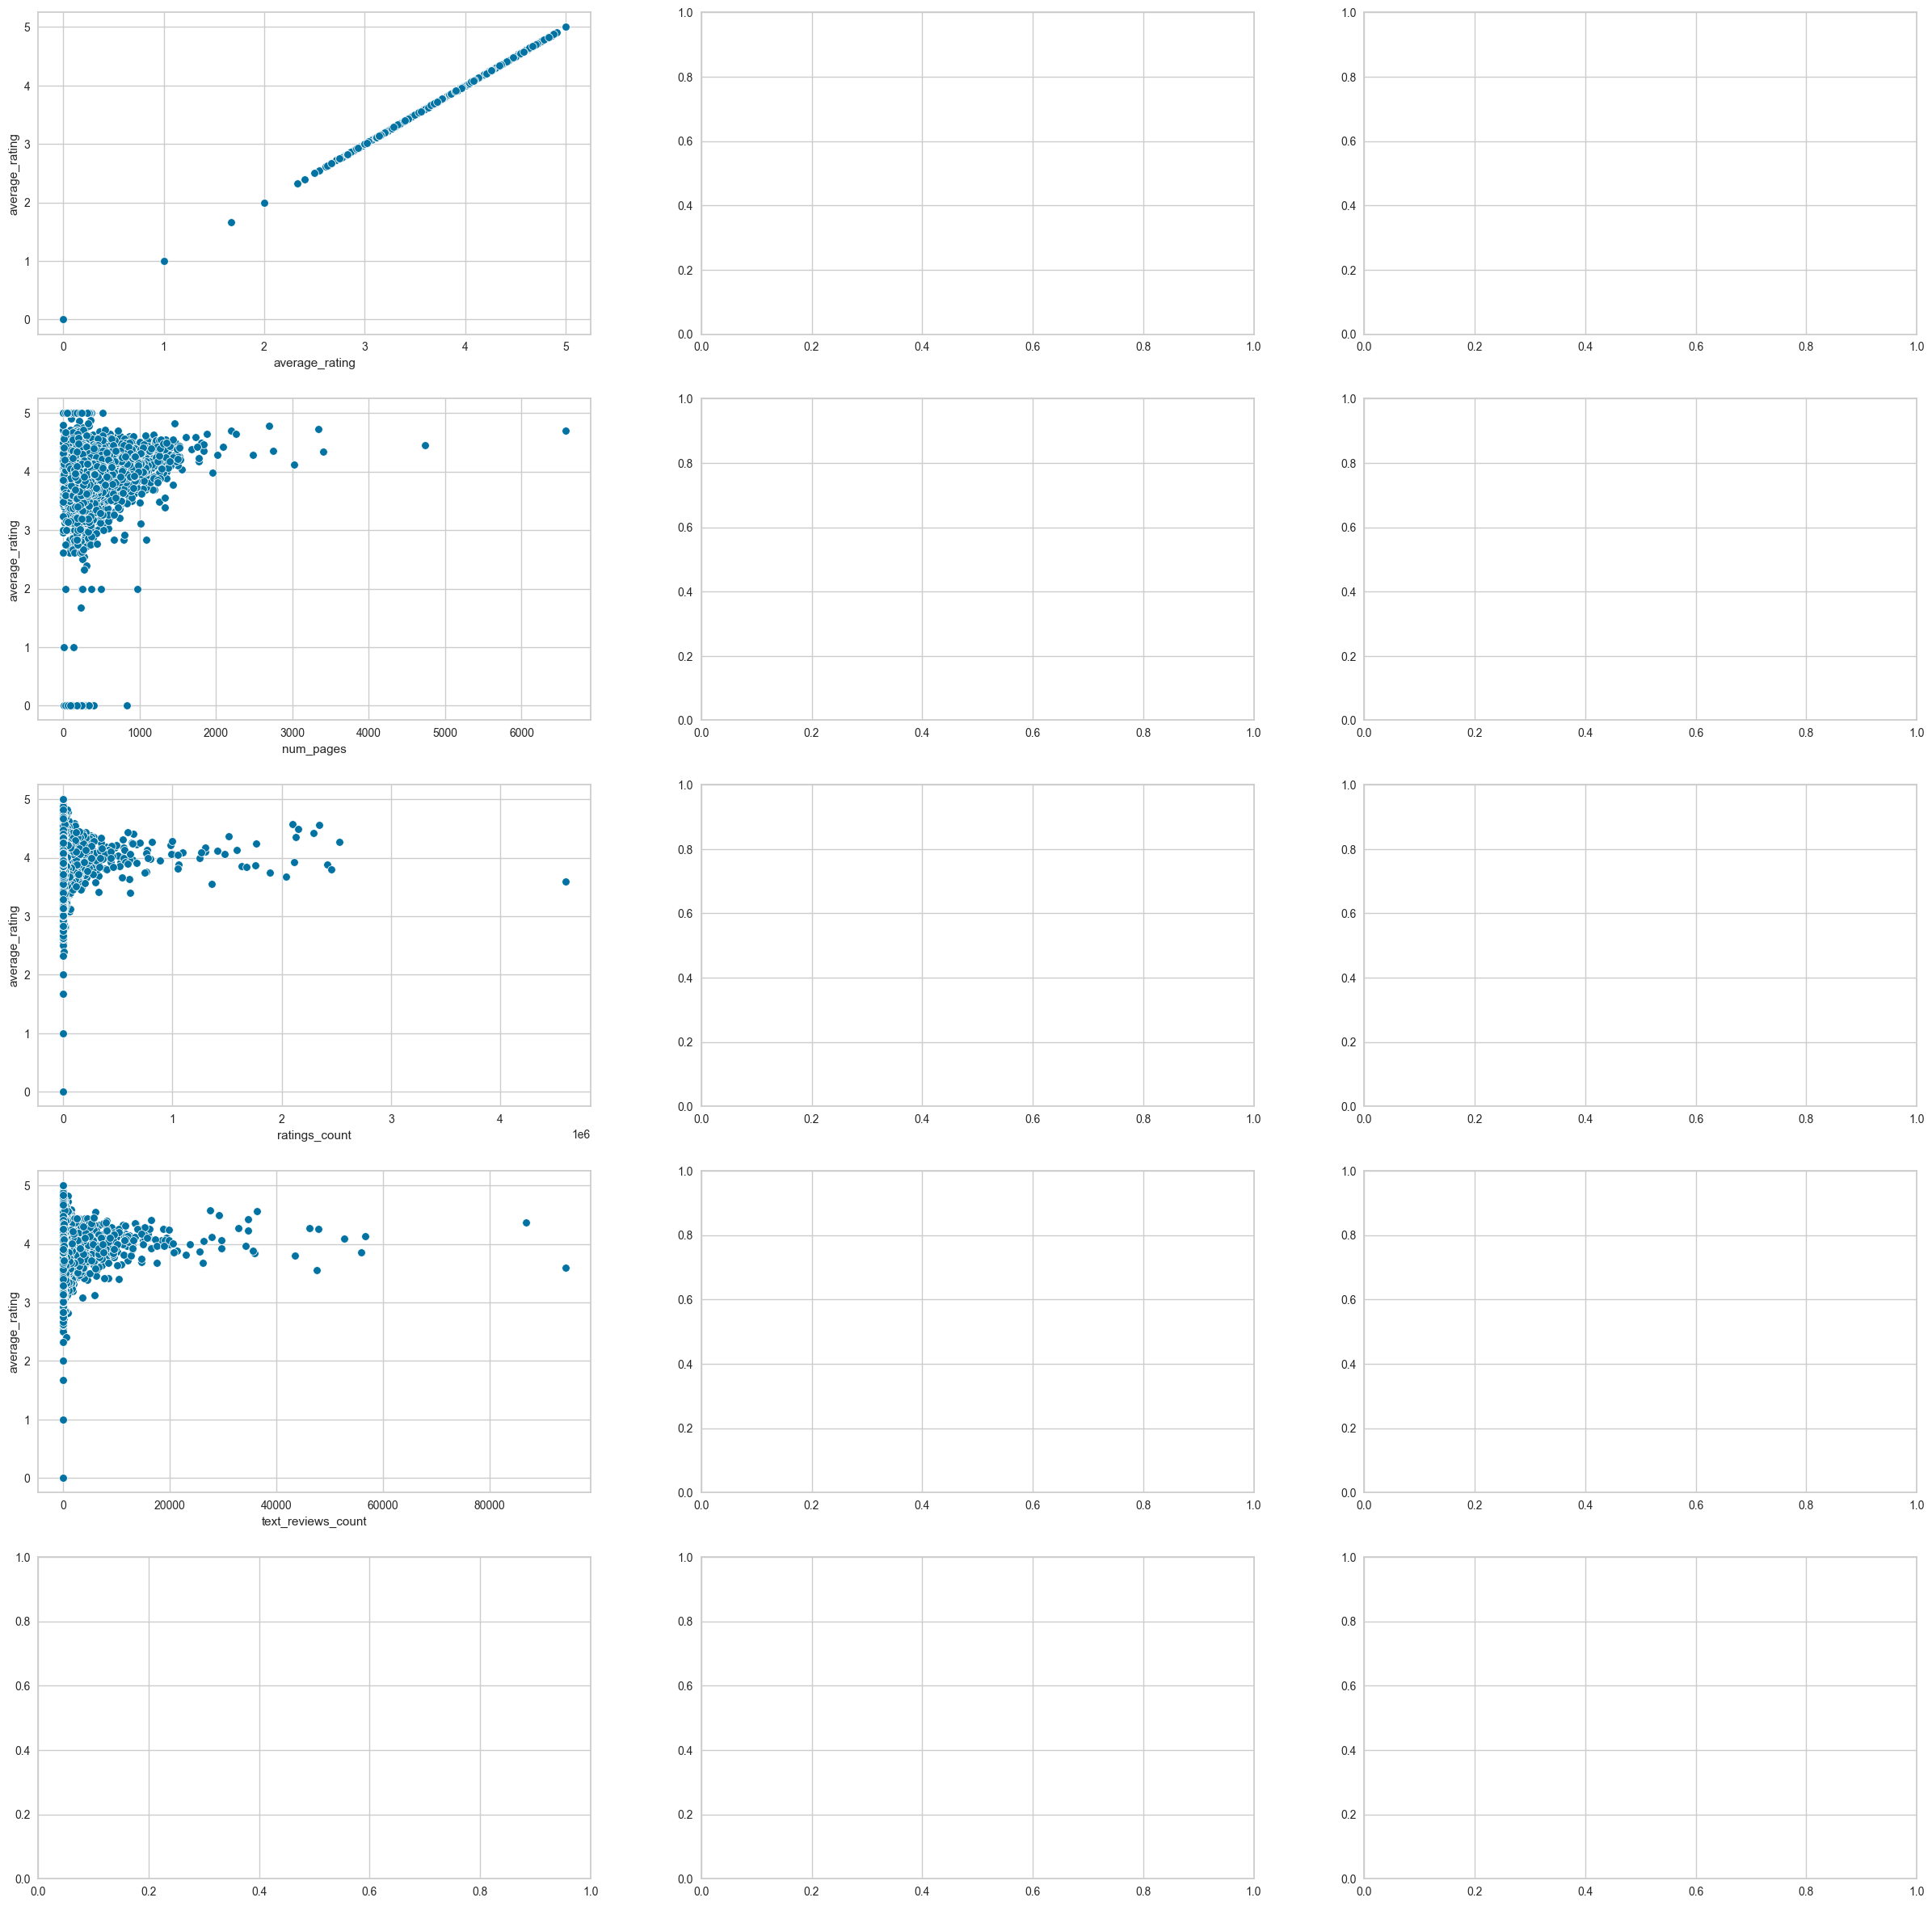

In [133]:

f, axes = plt.subplots(5,3 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=combined_data, x = feature, y= "average_rating",ax=axes[i%7, i//7])

Maybe we should try getting rid of outliers for only text_review_counts and rating_count
and drop title


# Create a figure with 3 subplots
f, axes = plt.subplots(3, 1, figsize=(30, 30), sharex=False)

# Plot countplots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=combined_df, x=feature, hue="Label", ax=axes[i])

plt.tight_layout()
plt.show()

f, axes = plt.subplots(7,7 , figsize=(30, 30), sharex=False)
for i, feature in enumerate(categorical_features):
    sort_list = sorted(combined_df.groupby(feature)['average_rating'].median().items(), key= lambda x:x[1], reverse = True)
    order_list = [x[0] for x in sort_list ]
    sns.boxplot(data = combined_df, x = feature, y = 'average_rating', order=order_list, ax=axes[i%7, i//7])
plt.show()

In [134]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  object 
 5   language_code       11127 non-null  object 
 6   num_pages           11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [135]:
combined_df.publication_year.nsmallest(10)

AttributeError: 'DataFrame' object has no attribute 'publication_year'

from scipy import stats
from scipy.stats import norm, skew  # for some statistics
import pandas as pd

# Assuming combined_df is already defined

numeric_feats = combined_df.dtypes[combined_df.dtypes != 'object'].index
# get the features except object types

# check the skew of all numerical features
skewed_feats = combined_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\n Skew in numerical features: \n')
skewness_df = pd.DataFrame({'Skew': skewed_feats})
print(skewness_df.head(10))


from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder

# Apply PowerTransformer to columns
log_list = ['ratings_count', 'text_reviews_count', 'num_pages', 'publication_year']
# log_list = ['LotArea', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF']
# log_list = skewness_df[abs(skewness_df) > 1].dropna().index


for col in log_list:
    power = PowerTransformer(method='yeo-johnson', standardize=True)
    combined_df[[col]] = power.fit_transform(combined_df[[col]]) # fit with combined_data to avoid overfitting with training data?

print('Number of skewed numerical features got transform : ', len(log_list))

In [ ]:
combined_df.head()

from scipy import stats
from scipy.stats import norm, skew # for some statistics

numeric_feats = combined_df.dtypes[combined_df.dtypes != 'object'].index
# get the features except object types

# check the skew of all numerical features
skewed_feats = combined_df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(10))

In [ ]:
categorical_features

In [ ]:
combined_df.info()

let's drop authors and publisher as it's too many dimensions
then encode language_code and year

In [ ]:
continuous_features

In [ ]:
combined_df.info()

In [ ]:
data_language_code=pd.get_dummies(combined_df["language_code"],dtype=int)
data_language_code

In [ ]:
combined_df=pd.concat([combined_df,data_language_code],axis=1)
combined_df.drop(["language_code"],axis=1, inplace=True)

In [ ]:
combined_df.info()

In [ ]:
combined_df.head()

In [ ]:
combined_df.info()

In [ ]:
# Identifying rows with negative values in specified columns
negative_values_df = combined_df[
    (combined_df['num_pages'] < 0) |
    (combined_df['ratings_count'] < 0) |
    (combined_df['text_reviews_count'] < 0) |
    (combined_df['publication_year'] < 0)
]

# Display the rows with negative values
negative_values_df


In [ ]:

# List of columns to clip
columns_to_clip = ["text_reviews_count", "ratings_count","publication_year"]

# Clipping the specified columns
for col in columns_to_clip:
    combined_df[col].clip(lower=combined_df[col].quantile(0.20), upper=combined_df[col].quantile(0.80), inplace=True)

# Plotting boxplots before clipping
for col in columns_to_clip:
    sns.boxplot(x=combined_df[col])
    plt.title(f'Boxplot of {col} (Before Clipping)')
    plt.show()

# Copy the processed data
data_wo_outliers = combined_df.copy()

# Plotting boxplots after clipping
for col in columns_to_clip:
    sns.boxplot(x=data_wo_outliers[col])
    plt.title(f'Boxplot of {col} (After Clipping)')
    plt.show()


In [ ]:
combined_df.info()

In [ ]:
X=combined_df.drop("average_rating",axis=1)
y=combined_df.average_rating

In [ ]:
X

In [ ]:
y

In [ ]:
X.ndim

In [ ]:
y.ndim

In [ ]:
combined_df.describe()

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
modelbas1 = GradientBoostingRegressor()
viz = FeatureImportances(modelbas1)
viz.fit(X, y)
viz.show();

In [ ]:
modelbas1 = LinearRegression()
viz = FeatureImportances(modelbas1)
viz.fit(X, y)
viz.show();

In [ ]:
modelbas1 = SGDRegressor()
viz = FeatureImportances(modelbas1)
viz.fit(X, y)
viz.show();

In [ ]:
modelbas1 = DecisionTreeRegressor()
viz = FeatureImportances(modelbas1)
viz.fit(X, y)
viz.show();

In [ ]:
combined_df.isna().sum()

In [ ]:
# !pip install lazypredict

In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
X=combined_df.drop("average_rating",axis=1)
y=combined_df.average_rating

In [ ]:
X_train_bas, X_test_bas, y_train_bas, y_test_bas = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bas.shape, X_test_bas.shape, y_train_bas.shape, y_test_bas.shape

In [ ]:
8901 + 2226

In [ ]:
X_train_bas.ndim, X_test_bas.ndim, y_train_bas.ndim, y_test_bas.ndim

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_bas, X_test_bas, y_train_bas, y_test_bas)

models

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [ ]:
#lr_df = combined_df["others","num_pages"].reset_index(drop=True)

In [ ]:
lr_df = df.reset_index(drop=True)

In [ ]:
lr_df.head()

In [ ]:
X_lr = lr_df.drop("average_rating",axis=1)
y_lr = combined_df["average_rating"]

In [ ]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2,random_state=101)
X_train_lr.shape, X_test_lr.shape, y_train_lr.shape, y_test_lr.shape

In [ ]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train_lr, y_train_lr)
model_reg.score(X_test_lr, y_test_lr)

In [ ]:
y_pred_lr = model_reg.predict(X_test_lr)

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
root_mean_squared_error(y_test_lr,y_pred_lr)

In [ ]:
comparison_lr= pd.DataFrame({'Actual': y_test_lr, 'Predicted': y_pred_lr, 'Residual': y_test_lr - y_pred_lr})

In [ ]:
comparison_lr

In [ ]:
model1 = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), HistGradientBoostingRegressor(random_state=42))
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

In [ ]:
y_predict = model1.predict(X_test)

In [ ]:
comparison_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': y_test - y_predict})

In [ ]:
comparison_df

In [ ]:
comparison_df.describe()

In [ ]:
comparison_df.info()

In [ ]:
comparison_df.shape

In [ ]:
comparison_df.isna().sum()

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(comparison_df);

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid");
sns.lineplot(data=comparison_df, palette="tab10", linewidth=2.5);

In [ ]:
from yellowbrick.regressor import PredictionError

In [ ]:
fig = plt.figure(figsize=(5, 5))
viz = PredictionError(model1)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
LinearSVR().get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
HistGradientBoostingRegressor().get_params()

In [ ]:
parameters = {'max_features':[0.1, 1.0],'verbose':[0,1,2],'random_state':[0,2],'tol':[1e-05]}
hbr = HistGradientBoostingRegressor()
model3 = GridSearchCV(hbr, parameters, cv=5, scoring='accuracy')
model3.fit(X_train, y_train)

In [ ]:
# Access the best hyperparameters found by GridSearchCV
best_params = model3.best_params_

In [ ]:
best_params

In [ ]:
# Access the best model
best_model = model3.best_estimator_

In [ ]:
best_model

In [ ]:
best_model.score(X_test, y_test)

In [ ]:
fig = plt.figure(figsize=(5, 5))
viz = PredictionError(best_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
#Data cleaning (title, language, date, publisher)
#normalize outliers with robust scaler

In [ ]:
data=future_data.copy()

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
set(data.language_code)

BAS drop title because each one is identical

In [ ]:
data.drop(["title","isbn","isbn13"],axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
data_language_code=pd.get_dummies(data["language_code"],dtype=int)
data_language_code

In [ ]:
data_combined=pd.concat([data,data_language_code],axis=1)
data_combined.drop(["language_code"],axis=1, inplace=True)

In [ ]:
data_combined["publication_date"] = pd.to_datetime(data_combined["publication_date"], format="%m/%d/%Y", errors='coerce')

In [ ]:
data_combined['publication_year'] = data_combined['publication_date'].dt.year
data_combined.drop("publication_date",axis=1,inplace=True)
#df_combined[['publication_month','publication_year']] = df_combined[['publication_month','publication_year']].astype(int)

In [ ]:
# Assuming df_combined is your DataFrame
# First, coerce errors to NaT to identify problematic entries
# Check for NaT values to identify problematic entries
problematic_rows = data_combined[data_combined["publication_year"].isna()]

# Inspect problematic rows to understand the issue
problematic_rows

# Further troubleshoot and correct the data as necessary

In [ ]:
data_combined['publication_year'].fillna(0000,axis=0,inplace=True)

In [ ]:
data_combined["publication_year"]=data_combined["publication_year"].astype(int)

In [ ]:
data_combined.head()

In [ ]:
data_combined.info()

In [ ]:
data_combined.to_csv("processed_data.csv",)

In [ ]:
processed_data=pd.read_csv("processed_data.csv",index_col="bookID")

In [ ]:
processed_data.head(5)

In [ ]:
processed_data.shape

In [ ]:
processed_data.info()

In [ ]:
processed_data.shape

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(processed_data.corr(),annot=True,center=True);

In [ ]:
X_processed=processed_data.drop("average_rating",axis=1)
y_processed=processed_data["average_rating"]

In [ ]:
X_train2, X_test2, y_train2, y_test2=train_test_split(X_processed,y_processed, test_size=0.2,random_state=0)

In [ ]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

In [ ]:
processed_model = LinearRegression()
viz = FeatureImportances(processed_model)
viz.fit(X_processed, y_processed)
viz.show();

In [ ]:
processed_model = SGDRegressor()
viz = FeatureImportances(processed_model)
viz.fit(X_processed, y_processed)
viz.show();

In [ ]:
processed_model = DecisionTreeRegressor()
viz = FeatureImportances(processed_model)
viz.fit(X_processed, y_processed)
viz.show();

In [ ]:
DecisionTreeRegressor().get_params()

In [ ]:
model3=DecisionTreeRegressor(random_state=0,splitter="best", max_depth=10, ccp_alpha=1.0,)
model3.fit(X_train2,y_train2)
model3.score(X_test2,y_test2)

In [ ]:
fig = plt.figure(figsize=(5, 5))
viz = PredictionError(model3)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models2, predictions2 = reg.fit(X_train2, X_test2, y_train2, y_test2)

models2

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor	

In [ ]:
GradientBoostingRegressor().get_params()	

In [ ]:
model4=GradientBoostingRegressor(random_state=0)
model4.fit(X_train2,y_train2)
model4.score(X_test2,y_test2)

In [ ]:
fig = plt.figure(figsize=(5, 5))
viz = PredictionError(model4)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
model5=make_pipeline(RobustScaler(),PolynomialFeatures(degree=2),GradientBoostingRegressor(random_state=0))
model5.fit(X_train2,y_train2)

In [ ]:
fig = plt.figure(figsize=(5, 5))
viz = PredictionError(model5)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_predict2=model5.predict(X_test2)

In [ ]:
comparison_df_processed= pd.DataFrame({'Actual': y_test2, 'Predicted': y_predict2, 'Residual': y_test2 - y_predict2})

In [ ]:
comparison_df_processed

In [ ]:
comparison_df_processed.describe()

In [ ]:
comparison_df.describe()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test2,y_predict2)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test2,y_predict2)

In [ ]:
r2_score(y_test,y_predict)

BAS

In [ ]:
processed_data.info()

In [ ]:
#for i in processed_data.select_dtypes(exclude=["object"]).columns:
 #   processed_data[i].clip(lower=processed_data[i].quantile(0.15), upper=processed_data[i].quantile(0.85), inplace=True)

In [ ]:
#for col in processed_data.select_dtypes(exclude=["object"]).columns:
#    sns.boxplot(x=processed_data[col])
#    plt.show()
    

In [ ]:
#data_wo_outliers = processed_data.copy()

In [ ]:
#for col in data_wo_outliers.select_dtypes(exclude=["object"]).columns:
#   sns.boxplot(x=data_wo_outliers[col])
#    plt.show()

In [ ]:
data_wo_outliers.describe()

In [ ]:
X3 = data_wo_outliers.drop("average_rating",axis=1)
y3 = data_wo_outliers["average_rating"]

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.2, random_state=42)

In [ ]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

In [ ]:
reg3 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models5, predictions5 = reg3.fit(X_train3, X_test3, y_train3, y_test3)

models5

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model6 = GradientBoostingRegressor(random_state=42)
model6.fit(X_train3, y_train3)

In [ ]:
y_pred3 = model6.predict(X_test3)

In [ ]:
r2_score(y_test3,y_pred3)

In [ ]:
data_wo_dates = data_wo_outliers.drop("publication_year",axis=1)

In [ ]:
data_wo_dates.head()

In [ ]:
processed_data2=data_wo_dates.reset_index(drop=True)

In [ ]:
processed_data2.head()

In [ ]:
X4 = processed_data2.drop("average_rating",axis=1)
y4 = processed_data2["average_rating"]

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.2, random_state=42)

In [ ]:
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

In [ ]:
reg4 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models6, predictions6 = reg4.fit(X_train4, X_test4, y_train4, y_test4)

models6